In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import ADASYN

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_") | X_columns.str.contains("_cnt"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 112)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=ADASYN(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[rktdpe9ego53g7W83USwCm-2018-10-16 16:56:07.539107] Launching
[Z7PdtzQyP9MesjoqiMGxGS-2018-10-16 16:56:07.711219] Launching
[QDESNjL2bxTfU3Ghs3qrwa-2018-10-16 16:56:07.877155] Launching
[B5TmW5Zt5J98tNikvHi8oF-2018-10-16 16:56:08.057358] Launching
[ZE3znxPrD7hji8oh3ttBZN-2018-10-16 16:56:08.233876] Launching
[qwqdgyisJzJZMwHkwU5XQL-2018-10-16 16:56:08.411112] Launching
[k76qRfxtCr2XgsGQ2sZQiJ-2018-10-16 16:56:08.587400] Launching
[NxqfcTZkDNsaVzU4u8QTUA-2018-10-16 16:56:08.782232] Launching
[gLkmLYVnY9QuLsbY5oKWXd-2018-10-16 16:56:09.026549] Launching
[4Dsvj8VrktQPYXqHeyNE3P-2018-10-16 16:56:09.222690] Launching
[4Dsvj8VrktQPYXqHeyNE3P-2018-10-16 16:59:42.995669] Done
[rktdpe9ego53g7W83USwCm-2018-10-16 16:59:46.513563] Done
[k76qRfxtCr2XgsGQ2sZQiJ-2018-10-16 17:00:23.829679] Done
[QDESNjL2bxTfU3Ghs3qrwa-2018-10-16 17:00:33.803278] Done
[qwqdgyisJzJZMwHkwU5XQL-2018-10-16 17:00:42.763646] Done
[ZE3znxPrD7hji8oh3ttBZN-2018-10-16 17:01:10.827207] Done
[gLkmLYVnY9QuLsbY5oKWXd-2018-10-16 17:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=ADASYN(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[Dgm8vbko3K5WgFdr23kBU7-2018-10-16 17:01:52.627860] Launching
[dQabNgUA6cxyW4maDWH9qX-2018-10-16 17:01:52.842647] Launching
[JtJpTqDrxorHP2NuNmq6Lk-2018-10-16 17:01:53.069703] Launching
[5sygFZVcF8HaZhifDCb5aX-2018-10-16 17:01:53.279660] Launching
[R7AtdVsqzbhhUWeSw5tfdB-2018-10-16 17:01:53.491731] Launching
[JXV5wTKgtKEnUPycb9UsVh-2018-10-16 17:01:53.695147] Launching
[rDjCnHv9bHuiDdXFouLFJa-2018-10-16 17:01:53.900301] Launching
[8R73QTLYL9TC538CsAE5Ch-2018-10-16 17:01:54.104384] Launching
[J7URo3BSi87yr7mMBEc34c-2018-10-16 17:01:54.300117] Launching
[7B9zHh5LVLmVfhHz2zmD9A-2018-10-16 17:01:54.483588] Launching
[Dgm8vbko3K5WgFdr23kBU7-2018-10-16 17:03:51.870598] Done
[8R73QTLYL9TC538CsAE5Ch-2018-10-16 17:03:58.559995] Done
[dQabNgUA6cxyW4maDWH9qX-2018-10-16 17:04:18.281789] Done
[J7URo3BSi87yr7mMBEc34c-2018-10-16 17:04:23.952931] Done
[JtJpTqDrxorHP2NuNmq6Lk-2018-10-16 17:04:36.146403] Done
[R7AtdVsqzbhhUWeSw5tfdB-2018-10-16 17:04:44.849142] Done
[7B9zHh5LVLmVfhHz2zmD9A-2018-10-16 17:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=ADASYN(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[kAAWUZdmMmYFYE5QvpyuKG-2018-10-16 17:05:44.814461] Launching
[LUZBS7BwFySfazQyoVXHcM-2018-10-16 17:05:44.997155] Launching
[EEDUXuDVkdVtjnbLVeKJDe-2018-10-16 17:05:45.184904] Launching
[epTZeMWtz4zm7WitQ6JBwf-2018-10-16 17:05:45.438058] Launching
[9EEheQL7eDJaCeYQFmKaEU-2018-10-16 17:05:45.722568] Launching
[SasprPqJDjXnnpDc63gVdV-2018-10-16 17:05:45.952046] Launching
[8yocRVDqC39gZJtnBsFn4b-2018-10-16 17:05:46.211183] Launching
[VDj9Fcf8cc5YfjPbh3YqVG-2018-10-16 17:05:46.391341] Launching
[zTdcSFpobZSJ9aWF6CUjf3-2018-10-16 17:05:46.621794] Launching
[rAipT2vKJEbazKFFKcVTQ7-2018-10-16 17:05:46.794714] Launching
[kAAWUZdmMmYFYE5QvpyuKG-2018-10-16 17:08:22.677570] Done
[VDj9Fcf8cc5YfjPbh3YqVG-2018-10-16 17:08:26.623494] Done
[SasprPqJDjXnnpDc63gVdV-2018-10-16 17:08:27.876854] Done
[zTdcSFpobZSJ9aWF6CUjf3-2018-10-16 17:08:28.548538] Done
[8yocRVDqC39gZJtnBsFn4b-2018-10-16 17:08:32.579406] Done
[epTZeMWtz4zm7WitQ6JBwf-2018-10-16 17:08:36.500510] Done
[9EEheQL7eDJaCeYQFmKaEU-2018-10-16 17:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=ADASYN(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[3XeeYWGHvcZtcqN2w3A2o3-2018-10-16 17:08:54.366000] Launching
[mpV4NkUbJgyNhNLCADqVjA-2018-10-16 17:08:54.531128] Launching
[3kxUeBDXc64sqNMM7geMg7-2018-10-16 17:08:54.699884] Launching
[szvVyjrJRVNPRyc22H5iCS-2018-10-16 17:08:54.871992] Launching
[UA75AU85Z8iyQxeBBKeN43-2018-10-16 17:08:55.054885] Launching
[gozkGLCPKpRLcX5V5ESrzE-2018-10-16 17:08:55.229692] Launching
[CwmwFif4yiw48LjqrpRQLB-2018-10-16 17:08:55.443532] Launching
[xT6PbXj7T53yJgbJh9HMa5-2018-10-16 17:08:55.638822] Launching
[gTPHKL6D55xb7ZTUKsJ5m9-2018-10-16 17:08:55.839558] Launching
[KZyYTXumvgNMsStxCE3qAo-2018-10-16 17:08:56.039536] Launching
[3XeeYWGHvcZtcqN2w3A2o3-2018-10-16 17:08:59.561616] Done
[3kxUeBDXc64sqNMM7geMg7-2018-10-16 17:08:59.846853] Done
[UA75AU85Z8iyQxeBBKeN43-2018-10-16 17:09:00.114611] Done
[mpV4NkUbJgyNhNLCADqVjA-2018-10-16 17:09:00.216378] Done
[szvVyjrJRVNPRyc22H5iCS-2018-10-16 17:09:00.266707] Done
[xT6PbXj7T53yJgbJh9HMa5-2018-10-16 17:09:00.759578] Done
[CwmwFif4yiw48LjqrpRQLB-2018-10-16 17:

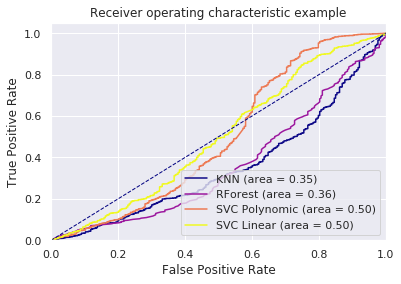

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})